# Semantics in NLP

* based on http://www.nltk.org/book/ch10.html

If we ignore connotative meaning of words (i.e., connotation is represented symbolically) and only care about denotation, then we can really use anything at our disposal to represent meaning, even a database query. 

In [1]:
import nltk

nltk.data.show_cfg('grammars/book_grammars/sql0.fcfg')

% start S
S[SEM=(?np + WHERE + ?vp)] -> NP[SEM=?np] VP[SEM=?vp]
VP[SEM=(?v + ?pp)] -> IV[SEM=?v] PP[SEM=?pp]
VP[SEM=(?v + ?ap)] -> IV[SEM=?v] AP[SEM=?ap]
NP[SEM=(?det + ?n)] -> Det[SEM=?det] N[SEM=?n]
PP[SEM=(?p + ?np)] -> P[SEM=?p] NP[SEM=?np]
AP[SEM=?pp] -> A[SEM=?a] PP[SEM=?pp]
NP[SEM='Country="greece"'] -> 'Greece'
NP[SEM='Country="china"'] -> 'China'
Det[SEM='SELECT'] -> 'Which' | 'What'
N[SEM='City FROM city_table'] -> 'cities'
IV[SEM=''] -> 'are'
A[SEM=''] -> 'located'
P[SEM=''] -> 'in'


In [2]:
from nltk import load_parser
cp = load_parser('grammars/book_grammars/sql0.fcfg')
query = 'What cities are located in China'
trees = list(cp.parse(query.split()))
answer = trees[0].label()['SEM']
answer = [s for s in answer if s]
q = ' '.join(answer)

q

'SELECT City FROM city_table WHERE Country="china"'

In [3]:
from nltk.sem import chat80
rows = chat80.sql_query('corpora/city_database/city.db', q)
for r in rows: print(r[0], end=" ")

canton chungking dairen harbin kowloon mukden peking shanghai sian tientsin 

<h1><center>First-order Logic</center></h1>

| Example	 | Description |
|:-------------:|:-------------:| 
| = | equality |
| !=	| inequality |
| exists	| existential quantifier |
| all	| universal quantifier|
| e.free()	| show free variables of e |
| e.simplify()|	carry out β-reduction on e |



In [4]:
read_expr = nltk.sem.Expression.fromstring
read_expr('dog(cyril)').free()

set()

In [5]:
read_expr('dog(x)').free()

{Variable('x')}

In [6]:
read_expr('own(angus, cyril)').free()

set()

In [7]:
read_expr('exists x.dog(x)').free()

set()

In [8]:
read_expr('((some x. walk(x)) -> sing(x))').free()

{Variable('x')}

In [9]:
read_expr('exists x.own(y, x)').free()

{Variable('y')}

Running this cell requires `prover9` to be installed
 * sudo apt install prover9*

In [10]:
NotFnS = read_expr('-north_of(f, s)') 
SnF = read_expr('north_of(s, f)')  
R = read_expr('all x. all y. (north_of(x, y) -> -north_of(y, x))') 
prover = nltk.Prover9()
prover.prove(NotFnS, [SnF, R])  

True

In [11]:
v2 = """
bruce => b
elspeth => e
julia => j
matthew => m
person => {b, e, j, m}
admire => {(j, b), (b, b), (m, e), (e, m)}
"""
val2 = nltk.Valuation.fromstring(v2)

In [12]:
dom2 = val2.domain
m2 = nltk.Model(dom2, val2)
g2 = nltk.Assignment(dom2)
fmla4 = read_expr('(person(x) -> exists y.(person(y) & admire(x, y)))')
m2.satisfiers(fmla4, 'x', g2)

{'b', 'e', 'j', 'm'}

In [13]:
fmla6 = read_expr('(person(y) & all x.((x = bruce | x = julia) -> admire(x, y)))')
m2.satisfiers(fmla6, 'y', g2)

{'b'}

## $\lambda$-Calculus

In [14]:
read_expr = nltk.sem.Expression.fromstring
expr = read_expr(r'\x.(walk(x) & chew_gum(x))')

expr

<LambdaExpression \x.(walk(x) & chew_gum(x))>

In [15]:
expr.free()

set()

In [16]:
read_expr(r'\x.(walk(x) & chew_gum(y))')

<LambdaExpression \x.(walk(x) & chew_gum(y))>

In [17]:
expr = read_expr(r'\x.(walk(x) & chew_gum(x))(gerald)')

expr

<ApplicationExpression \x.(walk(x) & chew_gum(x))(gerald)>

In [18]:
expr.simplify()

<AndExpression (walk(gerald) & chew_gum(gerald))>

# Discourse Representation Theory

In [19]:
read_dexpr = nltk.sem.DrtExpression.fromstring
drs1 = read_dexpr('([x, y], [angus(x), dog(y), own(x, y)])') 

drs1

<DRS ([x,y],[angus(x), dog(y), own(x,y)])>

In [20]:
drs1.draw()

In [21]:
drs4 = read_dexpr('([x, y], [angus(x), dog(y), own(x, y)])')
drs5 = read_dexpr('([u, z], [PRO(u), irene(z), bite(u, z)])')
drs6 = drs4 + drs5
drs6.simplify()

<DRS ([u,x,y,z],[angus(x), dog(y), own(x,y), PRO(u), irene(z), bite(u,z)])>

In [22]:
drs6.simplify().resolve_anaphora()

<DRS ([u,x,y,z],[angus(x), dog(y), own(x,y), (u = [x,y,z]), irene(z), bite(u,z)])>

# Distributional Semantics (word2vec)

* English models downloadable from https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models
* Models in other languages
* uses `gensim` https://radimrehurek.com/gensim/models/word2vec.html

In [23]:
from gensim.models.word2vec import Word2Vec as w


model = w.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)


/usr/local/lib/python3.5/dist-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [24]:
model.n_similarity('burger', 'sushi')

0.79219342866985742

In [25]:
model.n_similarity('burger', 'king')

0.76785124401970972

In [26]:
model.n_similarity('queen', 'king')

0.62666096966673801

In [27]:
model.most_similar('king', topn=5)

[('kings', 0.7138046026229858),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474)]

In [28]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [29]:
# print model.most_similar(['burger'], topn=5) # this takes a lot of memory for some reason
king = model['king']
len(king)

300

In [30]:
king

array([  1.25976562e-01,   2.97851562e-02,   8.60595703e-03,
         1.39648438e-01,  -2.56347656e-02,  -3.61328125e-02,
         1.11816406e-01,  -1.98242188e-01,   5.12695312e-02,
         3.63281250e-01,  -2.42187500e-01,  -3.02734375e-01,
        -1.77734375e-01,  -2.49023438e-02,  -1.67968750e-01,
        -1.69921875e-01,   3.46679688e-02,   5.21850586e-03,
         4.63867188e-02,   1.28906250e-01,   1.36718750e-01,
         1.12792969e-01,   5.95703125e-02,   1.36718750e-01,
         1.01074219e-01,  -1.76757812e-01,  -2.51953125e-01,
         5.98144531e-02,   3.41796875e-01,  -3.11279297e-02,
         1.04492188e-01,   6.17675781e-02,   1.24511719e-01,
         4.00390625e-01,  -3.22265625e-01,   8.39843750e-02,
         3.90625000e-02,   5.85937500e-03,   7.03125000e-02,
         1.72851562e-01,   1.38671875e-01,  -2.31445312e-01,
         2.83203125e-01,   1.42578125e-01,   3.41796875e-01,
        -2.39257812e-02,  -1.09863281e-01,   3.32031250e-02,
        -5.46875000e-02,

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [32]:
len(model.vocab)

3000000

In [33]:
import random
vocab = random.sample(model.vocab.keys(), 500) + ['king', 'queen', 'man', 'woman', 'beef', 'burger']

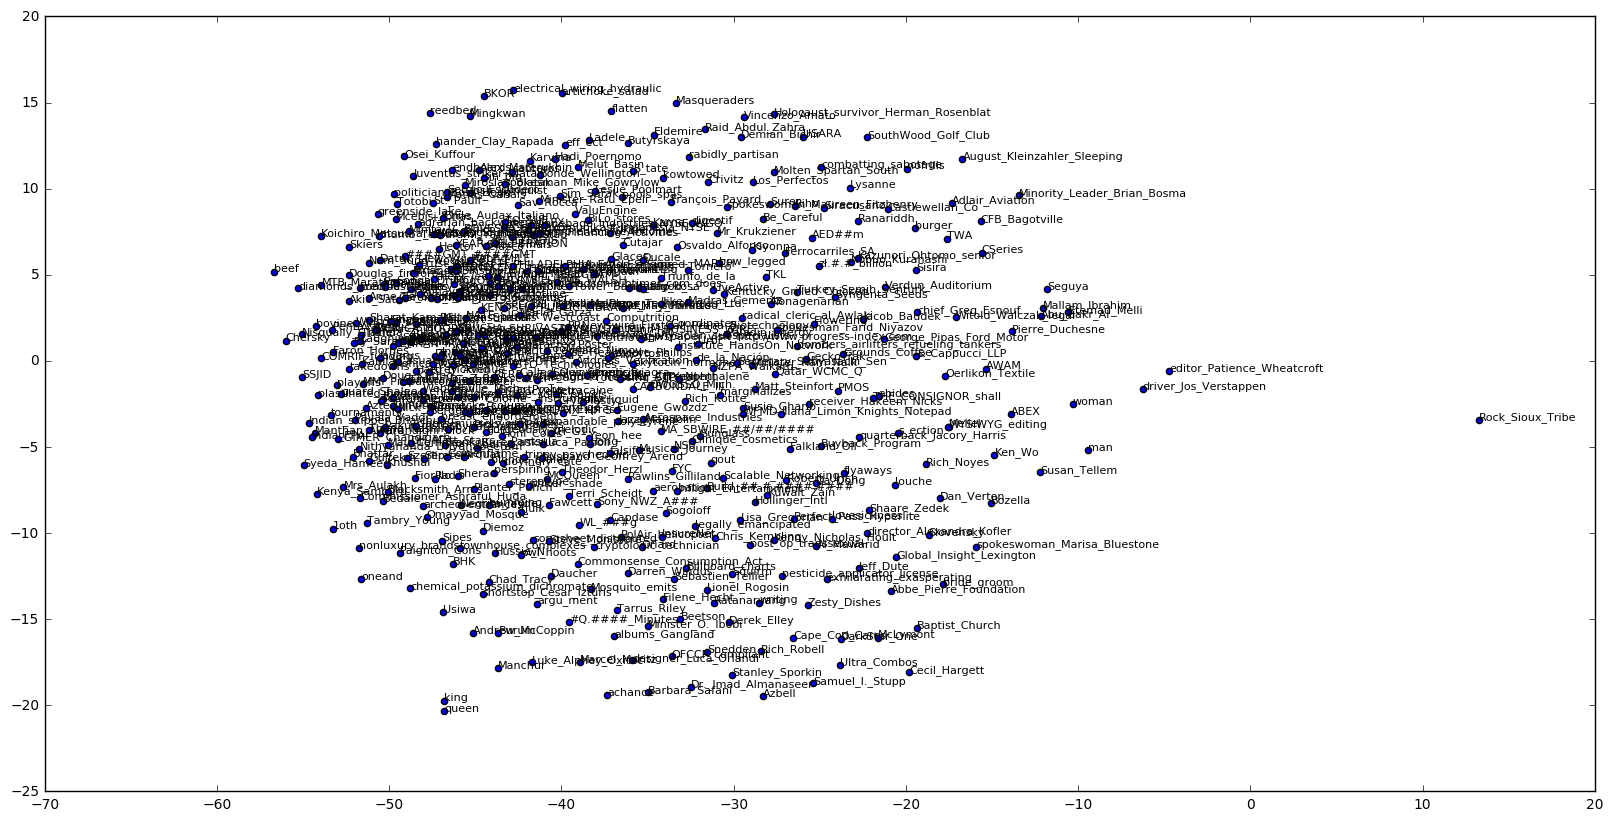

In [34]:
#X = model[vocab]
emb_tuple = tuple([model[v] for v in vocab])
X = np.vstack(emb_tuple)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for label, x, y in zip(vocab, X_tsne[:, 0], X_tsne[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',  fontsize=8)
plt.show()